In [1]:
%cd ../..

f:\DR\Stock-Market-Prediction\src


In [2]:
from lstm_normalize import prepare_data, add_indicators, normalize_data, prepare_sequences, prepare_tensors, split_train_and_test_data, get_lstm_data
from utils.chart import config_chart
from constants import SP500_TICKER

---

## For **prepare_data** function

In [3]:
data = prepare_data(SP500_TICKER)
data

,Open,High,Low,Close
Date,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971
...,...,...,...,...
2024-01-25,4886.660156,4898.149902,4869.339844,4894.160156
2024-01-26,4888.910156,4906.689941,4881.470215,4890.970215
2024-01-29,4892.950195,4929.310059,4887.399902,4927.930176


In [4]:
data.dtypes

Open     float64
High     float64
Low      float64
Close    float64
dtype: object

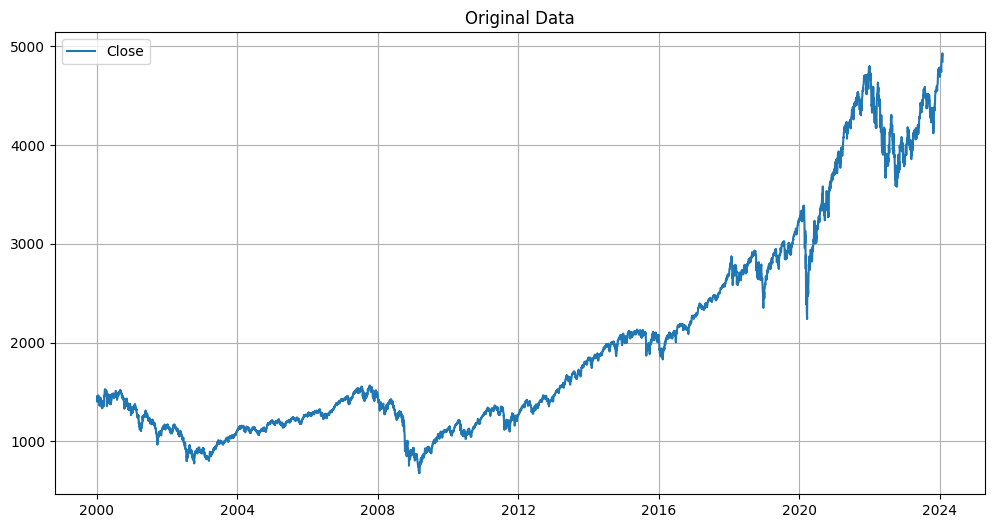

In [5]:
plt = config_chart('Original Data')
plt.plot(data['Close'])
plt.legend(['Close'])

In [6]:
# plt = config_chart('Original Data')
# plt.plot(data['Change'])
# plt.legend(['Change'])

---

## For **add_indicators** function

In [7]:
# extended_data = add_indicators(data)
# extended_data

In [8]:
# plt = config_chart('RSI Indicator')
# plt.plot(extended_data['RSI'])
# plt.legend(['RSI'])

In [9]:
# plt = config_chart('Simple Moving Average')
# plt.plot(extended_data['SMA'])
# plt.legend(['SMA'])

---

## For **normalize_data** function

In [10]:
normalized_data = normalize_data(data)
normalized_data

,Open,High,Low,Close
Date,,,,
2000-01-03,0.186024,0.184788,0.181568,0.183161
2000-01-04,0.182720,0.179410,0.171936,0.170036
2000-01-05,0.169580,0.169507,0.167289,0.170668
2000-01-06,0.170213,0.169183,0.170682,0.170984
2000-01-07,0.170529,0.176164,0.172713,0.179927
...,...,...,...,...
2024-01-25,0.990762,0.992223,0.988956,0.992057
2024-01-26,0.991292,0.994240,0.991811,0.991306
2024-01-29,0.992243,0.999580,0.993206,1.000000


In [11]:
# plt = config_chart('Normalized Data')
# plt.plot(normalized_data)
# plt.legend(['Open', 'High', 'Low', 'Close'])

----

## For **prepare_sequences** function

In [12]:
x, y, x_dates, y_dates = prepare_sequences(normalized_data)

In [13]:
x.shape, y.shape, x_dates.shape, y_dates.shape

((6041, 15, 4), (6041, 1, 1), (6041, 15), (6041, 1))

In [14]:
y

array([[[0.17113419]],

       [[0.16983347]],

       [[0.16080114]],

       ...,

       [[0.9913064 ]],

       [[1.        ]],

       [[0.99930377]]])

In [15]:
y[0], y_dates[0]

(array([[0.17113419]]),
 array(['2000-01-26T00:00:00.000000000'], dtype='datetime64[ns]'))

In [16]:
x[0], x_dates[0]

(array([[0.18271985, 0.17941036, 0.17193635, 0.17003575],
        [0.16957997, 0.16950674, 0.16728872, 0.17066847],
        [0.1702134 , 0.16918331, 0.17068206, 0.17098365],
        [0.17052894, 0.17616423, 0.1727129 , 0.17992659],
        [0.17948197, 0.18156815, 0.18229995, 0.18372064],
        [0.18328029, 0.18022249, 0.18064094, 0.17924213],
        [0.17879674, 0.17643101, 0.17891365, 0.1777579 ],
        [0.17731083, 0.17916955, 0.18013028, 0.18185774],
        [0.18141529, 0.1836079 , 0.18423197, 0.18549653],
        [0.18505819, 0.18175466, 0.18461319, 0.18314201],
        [0.18270102, 0.18086699, 0.18399665, 0.18332078],
        [0.18287999, 0.18188685, 0.18161047, 0.18089097],
        [0.18044744, 0.17892877, 0.1818599 , 0.17990072],
        [0.17945607, 0.17914358, 0.17146335, 0.17053205],
        [0.17007683, 0.16974046, 0.16983255, 0.1725314 ]]),
 array(['2000-01-04T00:00:00.000000000', '2000-01-05T00:00:00.000000000',
        '2000-01-06T00:00:00.000000000', '2000-01-07T0

In [17]:
# plt = config_chart('Last 10 Days Input and Next 3 Days Output Data')
# plt.plot(x_dates[0], x[0, :, 1])
# plt.plot(x_dates[0], x[0, :, 2])
# plt.plot(y_dates[0], y[0, :, 1])
# plt.plot(y_dates[0], y[0, :, 2])
# plt.legend(['Direction X', 'Change X', 'Direction Y', 'Change Y'])


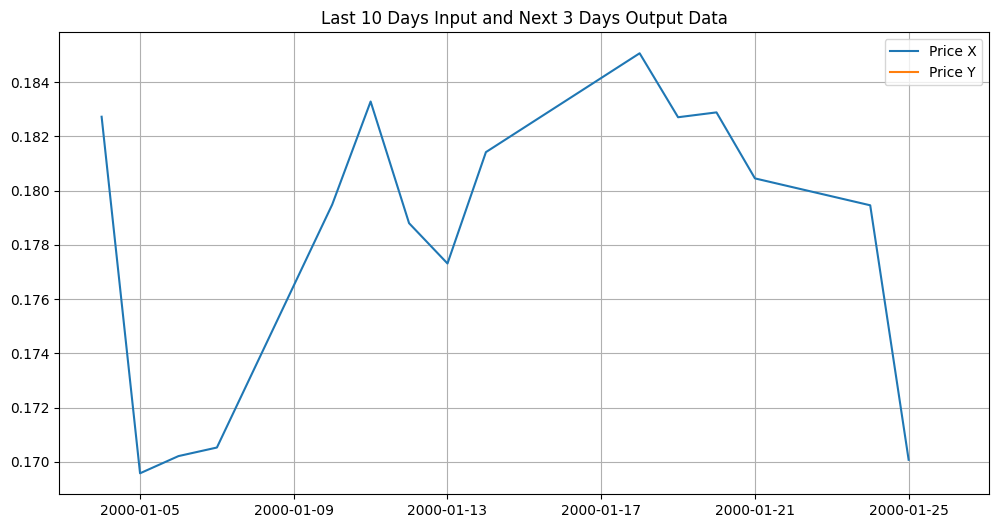

In [18]:
plt = config_chart('Last 10 Days Input and Next 3 Days Output Data')
plt.plot(x_dates[0], x[0, :, 0])
plt.plot(y_dates[0], y[0, :, 0])
plt.legend(['Price X', 'Price Y'])

---

## For **split_train_and_test_data** function

In [19]:
train, test, predict = split_train_and_test_data(x, y, x_dates, y_dates)

In [20]:
train['x'].shape,  train['x_dates'].shape, train['y'].shape,  train['y_dates'].shape

((4832, 15, 4), (4832, 15), (4832, 1, 1), (4832, 1))

In [21]:
test['x'].shape, test['x_dates'].shape, test['y'].shape, test['y_dates'].shape

((604, 15, 4), (604, 15), (604, 1, 1), (604, 1))

In [22]:
predict['x'].shape, predict['x_dates'].shape, predict['y'].shape, predict['y_dates'].shape

((605, 15, 4), (605, 15), (605, 1, 1), (605, 1))

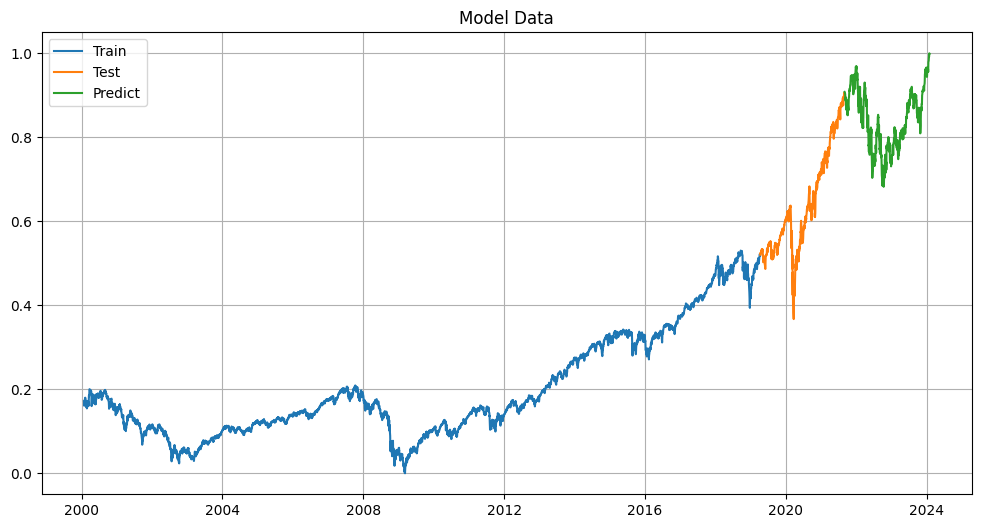

In [23]:
plt = config_chart('Model Data')
plt.plot(train['y_dates'][:, 0], train['y'][:, 0, 0])
plt.plot(test['y_dates'][:, 0], test['y'][:, 0, 0])
plt.plot(predict['y_dates'][:, 0], predict['y'][:, 0, 0])
plt.legend(['Train', 'Test', 'Predict'])

---

## For **prepare_tensors** function

In [24]:
# x_train, y_train = prepare_tensors(train['x'], train['y'])
# x_test, y_test = prepare_tensors(test['x'], test['y'])
# x_predict, y_predict = prepare_tensors(predict['x'], predict['y'])

In [25]:
# x_train.shape, y_train.shape

In [26]:
# print('x_train:', x_train.shape)
# print(x_train[0])

In [27]:
# print('y_train:', y_train.shape)
# print(y_train[0])

In [28]:
# x_test.shape, y_test.shape

In [29]:
# print('x_test:',x_test.shape)
# print(x_test[0])

In [30]:
# print('y_test:',y_test.shape)
# print(y_test[0])

---

## For **get_lstm_data** function

In [31]:
train, test, predict = get_lstm_data(SP500_TICKER)

In [32]:
print(train['x'].shape) 
print(train['x'][0])

print(train['x_dates'].shape) 
print(train['x_dates'][0])


(4832, 15, 4)
[[0.18271985 0.17941036 0.17193635 0.17003575]
 [0.16957997 0.16950674 0.16728872 0.17066847]
 [0.1702134  0.16918331 0.17068206 0.17098365]
 [0.17052894 0.17616423 0.1727129  0.17992659]
 [0.17948197 0.18156815 0.18229995 0.18372064]
 [0.18328029 0.18022249 0.18064094 0.17924213]
 [0.17879674 0.17643101 0.17891365 0.1777579 ]
 [0.17731083 0.17916955 0.18013028 0.18185774]
 [0.18141529 0.1836079  0.18423197 0.18549653]
 [0.18505819 0.18175466 0.18461319 0.18314201]
 [0.18270102 0.18086699 0.18399665 0.18332078]
 [0.18287999 0.18188685 0.18161047 0.18089097]
 [0.18044744 0.17892877 0.1818599  0.17990072]
 [0.17945607 0.17914358 0.17146335 0.17053205]
 [0.17007683 0.16974046 0.16983255 0.1725314 ]]
(4832, 15)
['2000-01-04T00:00:00.000000000' '2000-01-05T00:00:00.000000000'
 '2000-01-06T00:00:00.000000000' '2000-01-07T00:00:00.000000000'
 '2000-01-10T00:00:00.000000000' '2000-01-11T00:00:00.000000000'
 '2000-01-12T00:00:00.000000000' '2000-01-13T00:00:00.000000000'
 '2000-01

In [33]:

print(train['y'].shape)
print(train['y'][0])

print(train['y_dates'].shape) 
print(train['y_dates'][0])

(4832, 1, 1)
[[0.17113419]]
(4832, 1)
['2000-01-26T00:00:00.000000000']


In [34]:
print(test['x'].shape) 
print(test['x'][0])

print(test['x_dates'].shape) 
print(test['x_dates'][0])

print(test['y'].shape)
print(test['y'][0])

print(test['y_dates'].shape) 
print(test['y_dates'][0])

(604, 15, 4)
[[0.50403496 0.51112657 0.50608307 0.5123841 ]
 [0.50987492 0.50778597 0.50210378 0.49964244]
 [0.49845169 0.49919971 0.49846805 0.49908971]
 [0.50237244 0.50394025 0.50293212 0.50381753]
 [0.50403496 0.50292272 0.49910341 0.50073858]
 [0.50160477 0.50154162 0.50170374 0.50310717]
 [0.50604834 0.50539449 0.50651844 0.50756687]
 [0.51084272 0.51327251 0.51343691 0.51527963]
 [0.51546055 0.5140988  0.51581841 0.51529141]
 [0.5173091  0.51701443 0.51732916 0.51674032]
 [0.51681457 0.51607719 0.51779274 0.51814927]
 [0.5192094  0.51890072 0.52152263 0.52128943]
 [0.52022198 0.5195405  0.52100258 0.52200214]
 [0.5197793  0.51739922 0.51924943 0.51786937]
 [0.51855245 0.51806735 0.52061426 0.52022389]]
(604, 15)
['2019-03-21T00:00:00.000000000' '2019-03-22T00:00:00.000000000'
 '2019-03-25T00:00:00.000000000' '2019-03-26T00:00:00.000000000'
 '2019-03-27T00:00:00.000000000' '2019-03-28T00:00:00.000000000'
 '2019-03-29T00:00:00.000000000' '2019-04-01T00:00:00.000000000'
 '2019-04-0

In [35]:
print(predict['x'].shape) 
print(predict['x'][0])

print(predict['x_dates'].shape) 
print(predict['x_dates'][0])

print(predict['y'].shape)
print(predict['y'][0])

print(predict['y_dates'].shape) 
print(predict['y_dates'][0])

(605, 15, 4)
[[0.8870134  0.88920213 0.88697204 0.89013029]
 [0.89143098 0.89076029 0.89282214 0.89181678]
 [0.89067981 0.89356722 0.88737214 0.89457115]
 [0.89079053 0.88928478 0.88270566 0.88713128]
 [0.88580299 0.88744327 0.87794267 0.87588556]
 [0.87202729 0.8790128  0.87091596 0.87718626]
 [0.87864907 0.8850896  0.88010999 0.8856235 ]
 [0.88800476 0.89583835 0.89034424 0.89452877]
 [0.89603702 0.89653012 0.89787216 0.89610477]
 [0.89746176 0.89863122 0.89866763 0.89844752]
 [0.8982388  0.89725957 0.89474482 0.89228721]
 [0.8936116  0.90137452 0.89594729 0.90154772]
 [0.90295074 0.90704751 0.90528012 0.9061156 ]
 [0.90671615 0.90563817 0.90576018 0.90467846]
 [0.9064924  0.90698849 0.90722394 0.90501004]]
(605, 15)
['2021-08-12T00:00:00.000000000' '2021-08-13T00:00:00.000000000'
 '2021-08-16T00:00:00.000000000' '2021-08-17T00:00:00.000000000'
 '2021-08-18T00:00:00.000000000' '2021-08-19T00:00:00.000000000'
 '2021-08-20T00:00:00.000000000' '2021-08-23T00:00:00.000000000'
 '2021-08-2